In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Step 2 : import data
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [3]:
y = salary[['Salary']]

In [4]:
X = salary[['Experience Years']]

In [5]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 2345)

In [6]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28, 1), (12, 1))

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
model.intercept_

array([24979.12342695])

In [10]:
model.coef_

array([[9543.0995391]])

In [11]:
y_pred_linear = model.predict(X_test)

In [12]:
# Step 8 : model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [13]:
mean_absolute_error(y_test,y_pred)

4460.651763811397

In [14]:
mean_absolute_percentage_error(y_test,y_pred)

0.059079146828463554

In [15]:
mean_squared_error(y_test,y_pred)

31806375.599504903

In [29]:
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2345)

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mean_absolute_error(y_test, y_pred_linear), mean_absolute_percentage_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_linear)


(4460.651763811397, 0.059079146828463554, 31806375.599504903)

C:\Users\mishr\AppData\Local\Temp\ipykernel_29868\3755852469.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


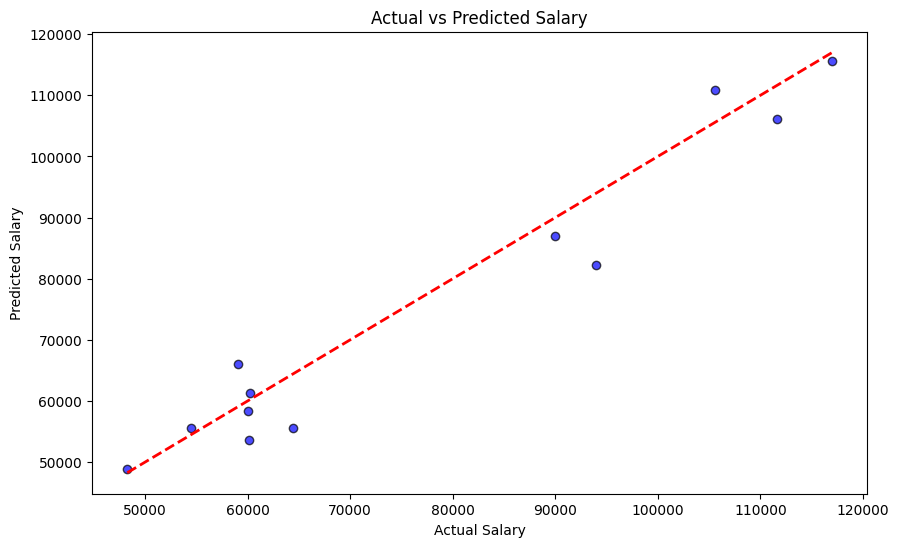

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()


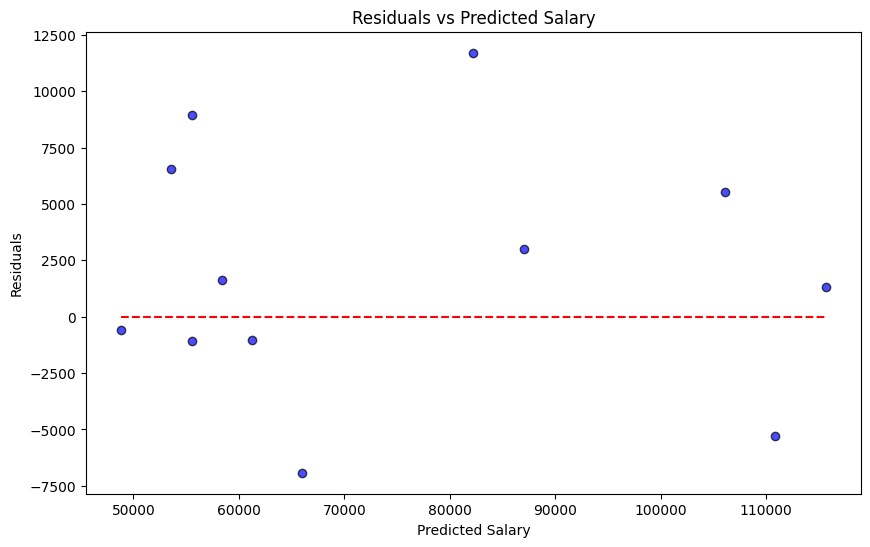

In [17]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary')
plt.show()


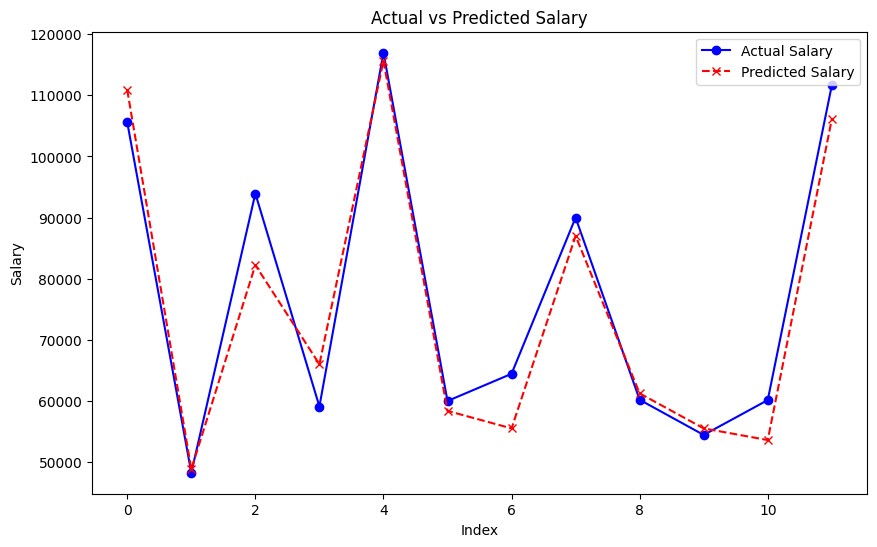

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Salary', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Salary', color='red', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()


### Polynomial Regression 
#### Polynomial regression can capture the non-linear relationship between the features and the target variable.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Transform features into polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.7, random_state=2345)

# Create and train the model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
mean_absolute_error(y_test, y_pred_poly), mean_absolute_percentage_error(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_poly)


(4502.704721229538, 0.05946858434691666, 33460493.192403626)

### Ridge Regression 
#### Ridge regression adds L2 regularization (adds penalty equivalent to square of magnitude of coeff) to the linear regression model to prevent overfitting.

In [20]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mean_absolute_error(y_test, y_pred_ridge), mean_absolute_percentage_error(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge)


(4548.706066473712, 0.059966931421883286, 34450858.43696411)

### Lasso Regression - Adds L1 regularization to the linear regression model, which can also perform feature selection by shrinking some coefficients to zero.

In [21]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mean_absolute_error(y_test, y_pred_lasso), mean_absolute_percentage_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_lasso)


(4502.68790129768, 0.05946840330370645, 33460130.622937337)

### Elastic Net - Elastic Net combines both L1 and L2 regularization.

In [22]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.9)
elastic_net_model.fit(X_train, y_train)

y_pred_elastic = elastic_net_model.predict(X_test)

mean_absolute_error(y_test, y_pred_elastic), mean_absolute_percentage_error(y_test, y_pred_elastic), mean_squared_error(y_test, y_pred_elastic)


(4516.281822779386, 0.05961566531267782, 33743263.26282513)

### Decision Tree Regression- 
Decision trees can model non-linear relationships without requiring feature transformation.

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=2345)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mean_absolute_error(y_test, y_pred_tree), mean_absolute_percentage_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_tree)


(4472.333333333333, 0.0635276395923416, 30562946.0)

### Random Forest Regression -
Random forests combine multiple decision trees to improve model performance and reduce overfitting. 

Here, n_estimators=150 means that the Random Forest Regressor will build 150 decision trees. Cross Validation can be used to select optimum no of trees

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=150, random_state=2345)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

mean_absolute_error(y_test, y_pred_forest), mean_absolute_percentage_error(y_test, y_pred_forest), mean_squared_error(y_test, y_pred_forest)


C:\Users\mishr\AppData\Local\Temp\ipykernel_29868\3674905357.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


(3789.6441388888893, 0.05161205742398949, 22876403.035969365)

### Gradient Boosting Regression

Gradient boosting builds an ensemble of trees in a sequential manner to improve performance.

Gradient Boosting Regressor is an ensemble learning technique that builds the model in a stage-wise fashion. It iteratively fits new models to the residual errors made by previous models, gradually improving the model's accuracy.

Role of n_estimators:Number of Boosting Stages: n_estimators determines how many boosting stages (trees) the algorithm will create. Each stage tries to correct the errors of the previous stages.

Effect of n_estimators:

High n_estimators: More stages can improve the model's performance by allowing it to fit more complex relationships. However, too many stages can lead to overfitting and increased computational cost.

Low n_estimators: Fewer stages make the model faster to train and may prevent overfitting, but the model might not capture the data's complexity well, leading to underfitting.

Choosing n_estimators:
Selecting the optimal value for n_estimators involves balancing the bias-variance trade-off. Cross-validation is commonly used to determine the best value.

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=2345)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mean_absolute_error(y_test, y_pred_gbr), mean_absolute_percentage_error(y_test, y_pred_gbr), mean_squared_error(y_test, y_pred_gbr)


C:\Users\mishr\anaconda4\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(4241.258723218037, 0.05966429852837002, 29173685.24828866)

### XGBoost Regression -

XGBoost is an efficient implementation of gradient boosting that often performs well in regression tasks.

XGBoost (Extreme Gradient Boosting) is an optimized and efficient implementation of gradient boosting. It is known for its speed and performance and is often used in machine learning competitions and real-world applications.

Role of n_estimators:Number of Boosting Rounds: n_estimators determines how many boosting rounds (or trees) the algorithm will create. Each boosting round attempts to correct the errors of the previous rounds.

Effect of n_estimators:High n_estimators: More boosting rounds can lead to a more accurate model, but too many can cause overfitting and increased computational cost.

Low n_estimators: Fewer boosting rounds can make the model faster to train and prevent overfitting, but it might also underfit the data if too low.

In [26]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=10, random_state=2345)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mean_absolute_error(y_test, y_pred_xgb), mean_absolute_percentage_error(y_test, y_pred_xgb), mean_squared_error(y_test, y_pred_xgb)


(4135.780598958333, 0.05553396712032841, 28545535.45992279)

### Let us compare all the models we made so far and check which one performed the best for predicting the salary

To find the best model, we'll compare the performance metrics (MAE, MAPE, MSE) of all the models

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

X = salary[['Experience Years']]
y = salary[['Salary']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2345)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.9)
tree_model = DecisionTreeRegressor(random_state=2345)
forest_model = RandomForestRegressor(n_estimators=150, random_state=2345)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=2345)
xgb_model = xgb.XGBRegressor(n_estimators=10, random_state=2345)

# Polynomial Regression requires special handling
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, train_size=0.7, random_state=2345)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Fit other models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Dictionary of models for Polynomial Regression
models = {
    'Linear Regression': (linear_model, X_test),
    'Polynomial Regression': (poly_model, X_test_poly),
    'Ridge Regression': (ridge_model, X_test),
    'Lasso Regression': (lasso_model, X_test),
    'Elastic Net': (elastic_net_model, X_test),
    'Decision Tree': (tree_model, X_test),
    'Random Forest': (forest_model, X_test),
    'Gradient Boosting': (gbr_model, X_test),
    'XGBoost': (xgb_model, X_test)
}

# Evaluate and print metrics for each model
def evaluate_models(models, y_test):
    for name, (model, X_test_model) in models.items():
        y_pred = model.predict(X_test_model)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f'{name}:')
        print(f'  MAE: {mae}')
        print(f'  MAPE: {mape}')
        print(f'  MSE: {mse}')
        print('')

# Evaluate all models
evaluate_models(models, y_test)


C:\Users\mishr\AppData\Local\Temp\ipykernel_29868\1736816711.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)
C:\Users\mishr\anaconda4\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Regression:
  MAE: 4460.651763811397
  MAPE: 0.059079146828463554
  MSE: 31806375.599504903

Polynomial Regression:
  MAE: 4502.704721229538
  MAPE: 0.05946858434691666
  MSE: 33460493.192403626

Ridge Regression:
  MAE: 4488.412073579701
  MAPE: 0.059423502280122165
  MSE: 31785371.547137562

Lasso Regression:
  MAE: 4460.659948645544
  MAPE: 0.0590792483580316
  MSE: 31806365.590717163

Elastic Net:
  MAE: 4468.459316480625
  MAPE: 0.05917599637186564
  MSE: 31797851.161481798

Decision Tree:
  MAE: 4472.5
  MAPE: 0.06353045990990937
  MSE: 30563617.666666668

Random Forest:
  MAE: 3714.79400925926
  MAPE: 0.050515825424550916
  MSE: 21437353.22153383

Gradient Boosting:
  MAE: 4402.712548829498
  MAPE: 0.06239640489289258
  MSE: 29493768.91511776

XGBoost:
  MAE: 4785.145182291667
  MAPE: 0.06657198390664926
  MSE: 34014715.65399933



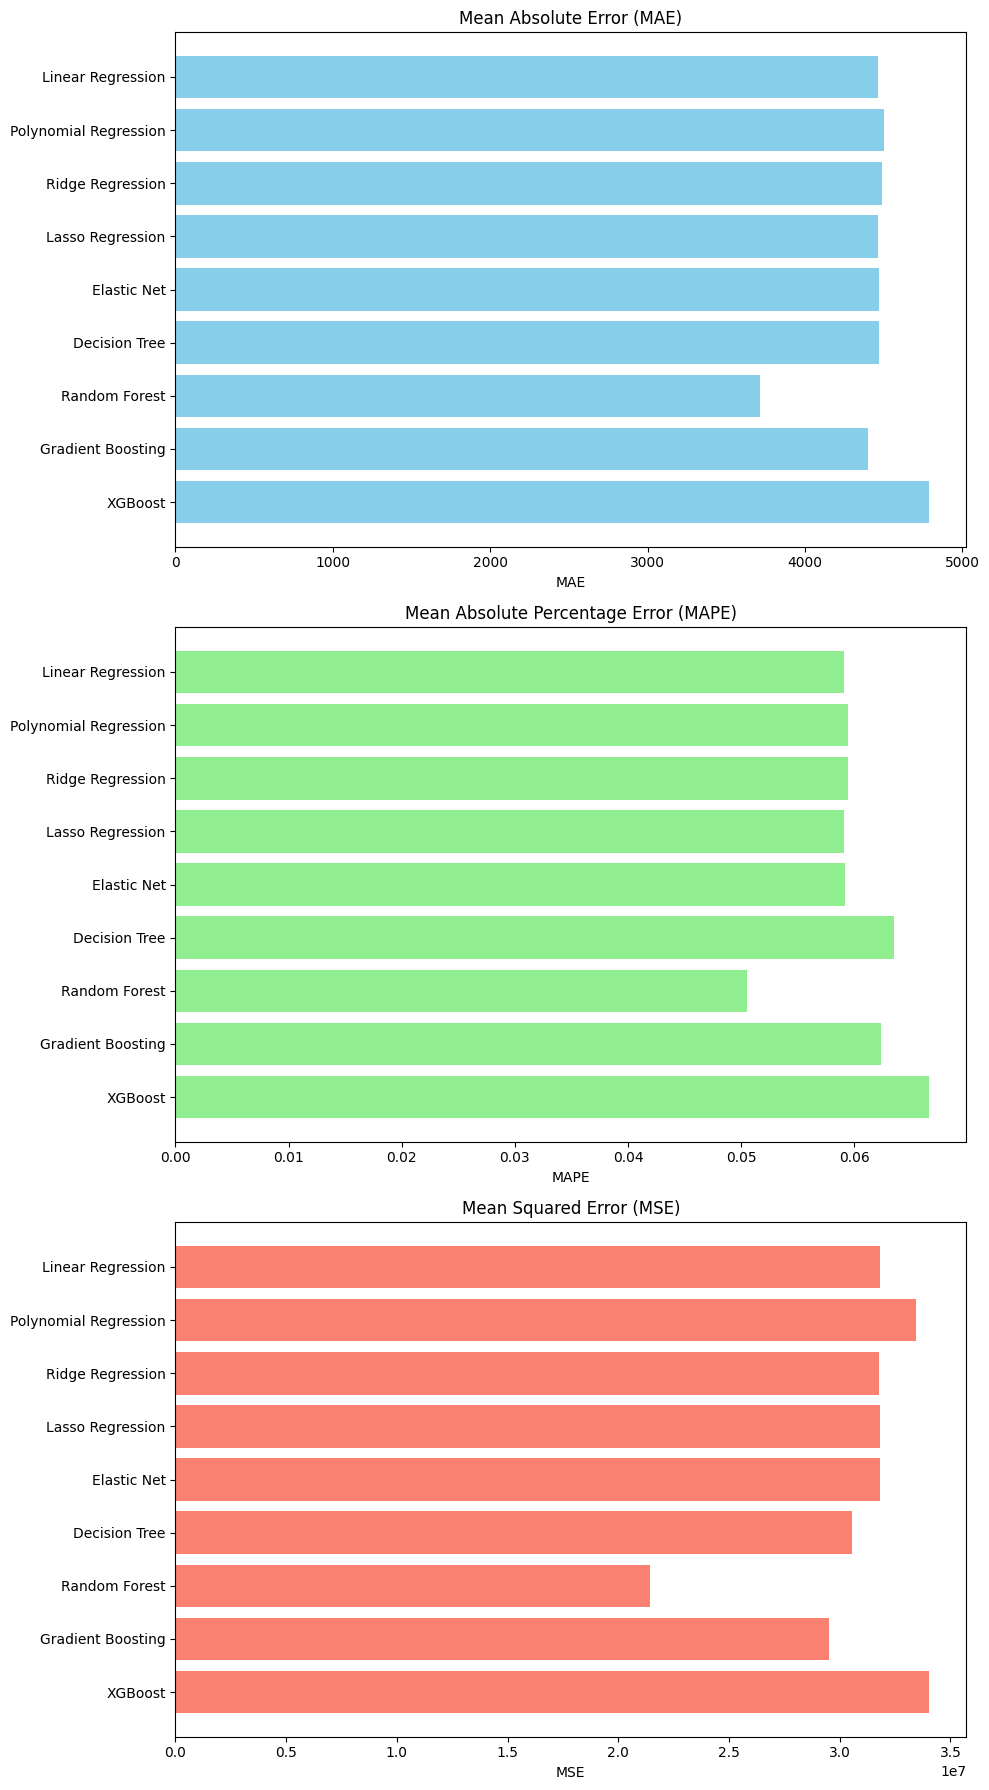

In [38]:
import matplotlib.pyplot as plt

results = {
    'Model': [],
    'MAE': [],
    'MAPE': [],
    'MSE': []
}

def evaluate_and_store_models(models, y_test):
    for name, (model, X_test_model) in models.items():
        y_pred = model.predict(X_test_model)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        results['Model'].append(name)
        results['MAE'].append(mae)
        results['MAPE'].append(mape)
        results['MSE'].append(mse)

# Evaluate and store all models
evaluate_and_store_models(models, y_test)

# Convert the results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot MAE
axs[0].barh(results_df['Model'], results_df['MAE'], color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_xlabel('MAE')
axs[0].invert_yaxis()

# Plot MAPE
axs[1].barh(results_df['Model'], results_df['MAPE'], color='lightgreen')
axs[1].set_title('Mean Absolute Percentage Error (MAPE)')
axs[1].set_xlabel('MAPE')
axs[1].invert_yaxis()

# Plot MSE
axs[2].barh(results_df['Model'], results_df['MSE'], color='salmon')
axs[2].set_title('Mean Squared Error (MSE)')
axs[2].set_xlabel('MSE')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()


### Based on the comparison above, we can conclude that "Random Forest" model worked the best with the lowest MAPE, MAE and MSE to predict the salary based on the experience level
